In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
os.getcwd()

'C:\\Users\\Mickey Vogt\\Documents\\adams-docs\\adams-projects\\COVID-19\\ajvogt-analysis'

In [3]:
path = '../csse_covid_19_data/csse_covid_19_time_series/'
df = pd.read_csv(path+'time_series_covid19_confirmed_US.csv')
print(df.shape)
print(df.head())

(3261, 128)
   UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_  ... 5/8/20  5/9/20  5/10/20  5/11/20  5/12/20  5/13/20  \
0 -14.2710 -170.1320  ...      0       0        0        0        0        0   
1  13.4443  144.7937  ...    151     151      151      151      152      152   
2  15.0979  145.6739  ...     15      16       16       19       19       19   
3  18.2208  -66.5901  ...   2156    2173     2198     2256     2299     2329   
4  18.3358  -64.8963  ...     68      68       69       69       69       69   

   5/14/20  5/15/20 

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 128 columns):
 #   Column          Dtype  
---  ------          -----  
 0   UID             int64  
 1   iso2            object 
 2   iso3            object 
 3   code3           int64  
 4   FIPS            float64
 5   Admin2          object 
 6   Province_State  object 
 7   Country_Region  object 
 8   Lat             float64
 9   Long_           float64
 10  Combined_Key    object 
 11  1/22/20         int64  
 12  1/23/20         int64  
 13  1/24/20         int64  
 14  1/25/20         int64  
 15  1/26/20         int64  
 16  1/27/20         int64  
 17  1/28/20         int64  
 18  1/29/20         int64  
 19  1/30/20         int64  
 20  1/31/20         int64  
 21  2/1/20          int64  
 22  2/2/20          int64  
 23  2/3/20          int64  
 24  2/4/20          int64  
 25  2/5/20          int64  
 26  2/6/20          int64  
 27  2/7/20          int64  
 28  2/8/20          i

In [5]:
df[df.Province_State == 'Missouri'].Admin2.unique()

array(['Adair', 'Andrew', 'Atchison', 'Audrain', 'Barry', 'Barton',
       'Bates', 'Benton', 'Bollinger', 'Boone', 'Buchanan', 'Butler',
       'Caldwell', 'Callaway', 'Camden', 'Cape Girardeau', 'Carroll',
       'Carter', 'Cass', 'Cedar', 'Chariton', 'Christian', 'Clark',
       'Clay', 'Clinton', 'Cole', 'Cooper', 'Crawford', 'Dade', 'Dallas',
       'Daviess', 'DeKalb', 'Dent', 'Douglas', 'Dunklin', 'Franklin',
       'Gasconade', 'Gentry', 'Greene', 'Grundy', 'Harrison', 'Henry',
       'Hickory', 'Holt', 'Howard', 'Howell', 'Iron', 'Jackson', 'Jasper',
       'Jefferson', 'Johnson', 'Knox', 'Laclede', 'Lafayette', 'Lawrence',
       'Lewis', 'Lincoln', 'Linn', 'Livingston', 'McDonald', 'Macon',
       'Madison', 'Maries', 'Marion', 'Mercer', 'Miller', 'Mississippi',
       'Moniteau', 'Monroe', 'Montgomery', 'Morgan', 'New Madrid',
       'Newton', 'Nodaway', 'Oregon', 'Osage', 'Ozark', 'Pemiscot',
       'Perry', 'Pettis', 'Phelps', 'Pike', 'Platte', 'Polk', 'Pulaski',
       '

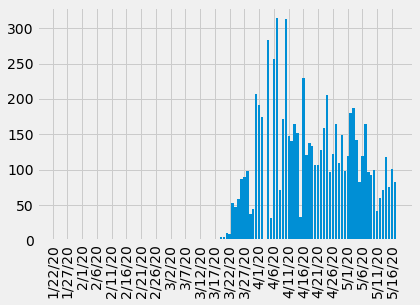

In [8]:
counties = ['St. Louis', 'St. Louis City', 'St. Charles', 'Franklin', 'Jefferson']
cond = (df.Province_State == 'Missouri')&\
       (df.Admin2.isin(counties))
df[cond].iloc[:, 11:]
xlabels = df.iloc[:, 11:].columns
xticks = np.arange(0, xlabels.shape[0], 1)
y = df[cond].iloc[:, 11:].sum(axis=0).diff()
plt.bar(xticks, y)
steps = np.arange(0, xticks.shape[0], 5)
plt.xticks(xticks[steps], xlabels[steps], rotation=90)
plt.show()


In [ ]:
df[cond].iloc[:, 11:]